[123. 260. 279. 259. 190. 151. 126. 102.  78.  93.  66.  89.  61.  83.
  35.  54.  52.  84.  33.  44.] [257. 203. 169. 193. 196. 176. 168. 130. 132. 123. 113. 119. 115. 117.
  88.  71.  45.  46.  46.  50.]
[0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [ 1.  3.  8.  6.  7.  8.  5.  7.  7.  7.  8.  9.  7.  7. 11. 11. 11.  8.
  1.  0.]


Text(0, 0.5, 'fgas/f_ave ')

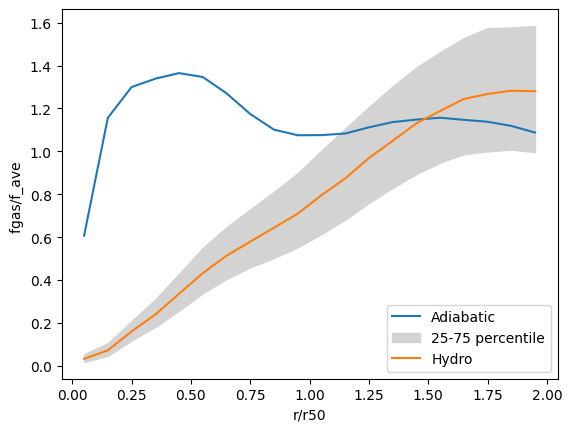

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H_13.hdf5",'r')
hdm=np.array(f['Ndm'])[-10000:]
hg=np.array(f['Ng'])[-10000:]
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H_13.hdf5",'r')
hdm_ad=np.array(f['Ndm'])[-10000:]
hg_ad=np.array(f['Ng'])[-10000:]
hg_T_ad=np.array(f['Ng_T'])
#hg_X_ad=np.array(f['Ng_Xray'])
#hg+=10**-15
#hdm_ad+=10**-15
f.close()
print(np.sum(hg_ad,axis=2)[0],np.sum(hdm,axis=2)[0])

hist=np.sum(hg_ad,axis=2)*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg,axis=2)*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')
print(hg[1000][0],hg_ad[1000][0])
ax.set_xlabel('r/r50')
ax.set_ylabel('fgas/f_ave ')

Text(0, 0.5, 'fgas/f_ave ')

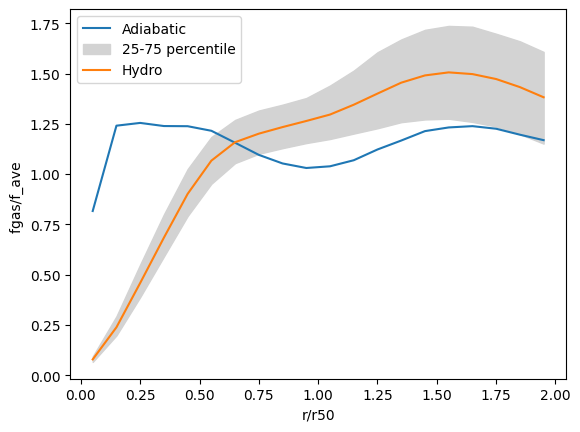

In [5]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H_13.hdf5",'r')
hdm=np.array(f['Ndm'])[0:10000]
hg=np.array(f['Ng'])[0:10000]
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/2d_fgas_H_13.hdf5",'r')
hdm_ad=np.array(f['Ndm'])[0:10000]
hg_ad=np.array(f['Ng'])[0:10000]

#hg_X_ad=np.array(f['Ng_Xray'])
#hg+=10**-15
#hdm_ad+=10**-15
f.close()


bins=np.linspace(0,2,21)
hist=np.sum(hg_ad,axis=2)*8.56/(np.sum(hdm_ad,axis=2)*45.2+np.sum(hg_ad,axis=2)*8.56)/(0.0494/0.316)

per=np.percentile(hist,[25,50,75],axis=0)
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(bin,per[1],label='Adiabatic')
hist=np.sum(hg,axis=2)*8.56/(np.sum(hdm,axis=2)*45.2+np.sum(hg,axis=2)*8.56)/(0.0494/0.316)
per=np.percentile(hist,[25,50,75],axis=0)
ax.fill_between(bin,per[0],per[2],color='lightgrey',label='25-75 percentile')
ax.plot(bin,per[1],label='Hydro')
ax.legend()
#ax.set_yscale('log')

ax.set_xlabel('r/r50')
ax.set_ylabel('fgas/f_ave ')

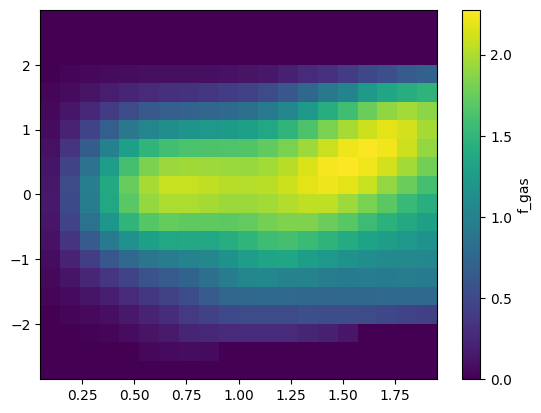

In [10]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/2d_fgas_H_13.hdf5",'r')
hdm=np.array(f['Ndm'])[0:10000]
hg=np.array(f['Ng'])[0:10000]
#hs=np.array(f['Ns'])
bin=np.array(f['bin'])
binv=np.array(f['binv'])
hg_T=np.array(f['Ng_T'])
#hg_X=np.array(f['Ng_Xray'])
#hg_S=np.array(f['Ng_S'])
f.close()
f=(hg*8.56)/(hdm*45.2+hg*8.56+10**-10)/(0.0494/0.316)
v_m=np.percentile(f,50,axis=0)
plt.figure()
plt.imshow(v_m.T,origin='lower',extent=[bin[0],bin[-1],binv[0],binv[-1]],aspect='auto')
plt.colorbar(label='f_gas')
